In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Downloads/df.csv')

In [3]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## EDA(Exploratory data analysis)

In [4]:
df.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

In [5]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
df1=df.dropna()

In [7]:
df1.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [8]:
df1['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [11]:
df1['Brand'].value_counts(),df1['Brand'].value_counts(normalize=True)*100

(Volkswagen       880
 Mercedes-Benz    823
 BMW              640
 Toyota           510
 Renault          445
 Audi             420
 Mitsubishi       307
 Name: Brand, dtype: int64,
 Volkswagen       21.863354
 Mercedes-Benz    20.447205
 BMW              15.900621
 Toyota           12.670807
 Renault          11.055901
 Audi             10.434783
 Mitsubishi        7.627329
 Name: Brand, dtype: float64)

In [12]:
df1['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [13]:
df1['Body'].value_counts()

sedan        1534
crossover     824
van           626
other         394
vagon         379
hatch         268
Name: Body, dtype: int64

In [14]:
df1['Body'].value_counts(normalize=True)*100

sedan        38.111801
crossover    20.472050
van          15.552795
other         9.788820
vagon         9.416149
hatch         6.658385
Name: Body, dtype: float64

In [15]:
df.head(2)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212


In [16]:
df1['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [17]:
df1['Engine Type'].value_counts()

Diesel    1861
Petrol    1468
Gas        590
Other      106
Name: Engine Type, dtype: int64

In [26]:
df1['Engine Type'].value_counts(normalize=True)*100

Diesel    46.236025
Petrol    36.472050
Gas       14.658385
Other      2.633540
Name: Engine Type, dtype: float64

In [19]:
df1['Registration'].unique()

array(['yes', 'no'], dtype=object)

([<matplotlib.patches.Wedge at 0x1a435463d00>,
 [Text(-1.0542024932210643, 0.31409728315681434, 'Yes'),
  Text(1.054202471165129, -0.3140973571829845, 'no')])

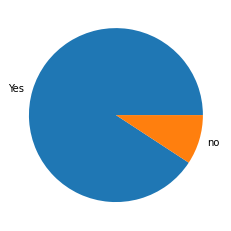

In [24]:
plt.pie((df1['Registration'].value_counts(normalize=True)*100),labels=['Yes','no'])

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
 8   Model         4025 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 314.5+ KB


In [29]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,4025.0,19552.308065,25815.734988,600.0,6999.0,11500.0,21900.0,300000.00
Mileage,4025.0,163.572174,103.394703,0.0,90.0,158.0,230.0,980.00
EngineV,4025.0,2.764586,4.935941,0.6,1.8,2.2,3.0,99.99
Year,4025.0,2006.379627,6.695595,1969.0,2003.0,2007.0,2012.0,2016.00


In [30]:
df1.skew()

Price       4.444409
Mileage     0.700196
EngineV    17.154962
Year       -0.963945
dtype: float64

In [31]:
df1.dtypes

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
lb=LabelEncoder()
df1['Brand']=lb.fit_transform(df1['Brand'])
df1['Body']=lb.fit_transform(df1['Body'])
df1['Engine Type']=lb.fit_transform(df1['Engine Type'])
df1['Registration']=lb.fit_transform(df1['Registration'])


<ipython-input-33-fc1205e87651>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Brand']=lb.fit_transform(df1['Brand'])
<ipython-input-33-fc1205e87651>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Body']=lb.fit_transform(df1['Body'])
<ipython-input-33-fc1205e87651>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [35]:
df1['Model']=lb.fit_transform(df1['Model'])

<ipython-input-35-8495d13b9ac2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Model']=lb.fit_transform(df1['Model'])


In [36]:
df1.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,1,4200.0,3,277,2.0,3,1,1991,18
1,2,7900.0,5,427,2.9,0,1,1999,261
2,2,13300.0,3,358,5.0,1,1,2003,232
3,0,23000.0,0,240,4.2,3,1,2007,219
4,5,18300.0,0,120,2.0,3,1,2011,222


In [37]:
df1.dtypes

Brand             int32
Price           float64
Body              int32
Mileage           int64
EngineV         float64
Engine Type       int32
Registration      int32
Year              int64
Model             int32
dtype: object

In [40]:
df1['Price']=df1['Price'].astype('int')
df1['EngineV']=df1['EngineV'].astype('int')

<ipython-input-40-3224d0f827d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Price']=df1['Price'].astype('int')
<ipython-input-40-3224d0f827d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['EngineV']=df1['EngineV'].astype('int')


In [41]:
df1.dtypes

Brand           int32
Price           int32
Body            int32
Mileage         int64
EngineV         int32
Engine Type     int32
Registration    int32
Year            int64
Model           int32
PEngineV        int32
dtype: object

In [42]:
df1.corr()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,PEngineV
Brand,1.000000,-0.150349,0.087402,-0.102119,-0.064759,-0.047752,0.158644,0.132984,0.333825,-0.064759
Price,-0.150349,1.000000,-0.312763,-0.473523,0.068740,0.032473,0.189405,0.485733,0.129327,0.068740
Body,0.087402,-0.312763,1.000000,0.279834,-0.066338,-0.198551,-0.072907,-0.160872,-0.099132,-0.066338
Mileage,-0.102119,-0.473523,0.279834,1.000000,0.018783,-0.188150,-0.227149,-0.664573,-0.109713,0.018783
EngineV,-0.064759,0.068740,-0.066338,0.018783,1.000000,0.031604,-0.006003,-0.019651,0.033193,1.000000
Engine Type,-0.047752,0.032473,-0.198551,-0.188150,0.031604,1.000000,0.126441,-0.057673,-0.183698,0.031604
Registration,0.158644,0.189405,-0.072907,-0.227149,-0.006003,0.126441,1.000000,0.244116,0.173257,-0.006003
Year,0.132984,0.485733,-0.160872,-0.664573,-0.019651,-0.057673,0.244116,1.000000,0.260314,-0.019651
Model,0.333825,0.129327,-0.099132,-0.109713,0.033193,-0.183698,0.173257,0.260314,1.000000,0.033193
PEngineV,-0.064759,0.068740,-0.066338,0.018783,1.000000,0.031604,-0.006003,-0.019651,0.033193,1.000000


In [45]:
df1=df1.drop(['PEngineV'],axis=1)

<AxesSubplot:>

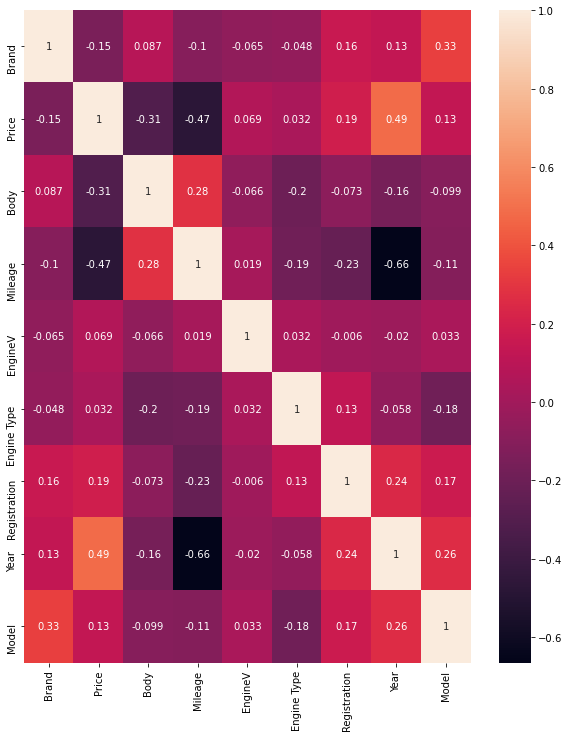

In [46]:
plt.figure(figsize=(10,12))
sns.heatmap(df1.corr(),annot=True)

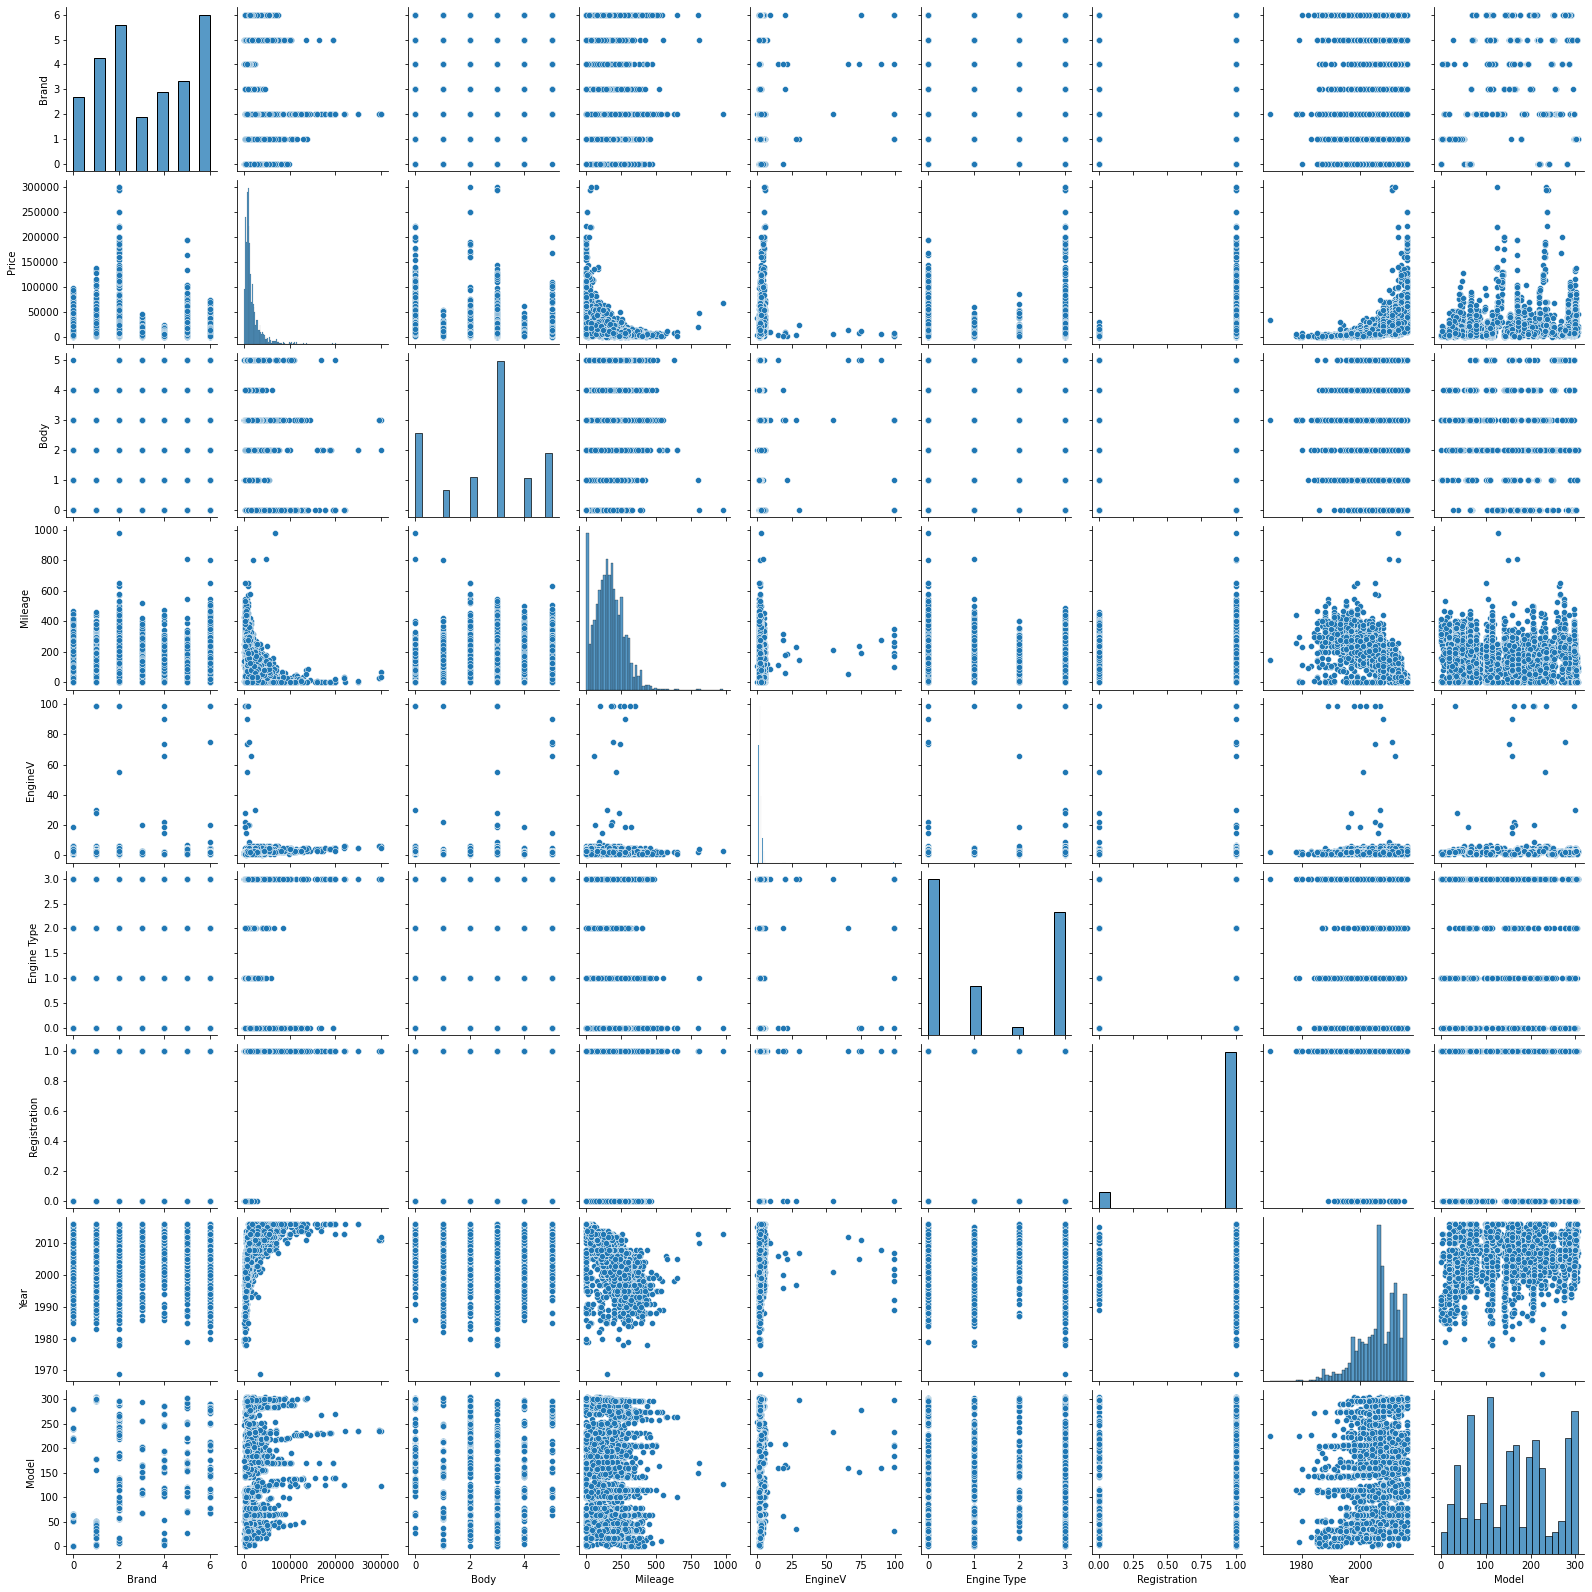

In [47]:
sns.pairplot(df1)

## Model Building

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [51]:
x=df1.drop(['Price'],axis=1)
y=df1['Price']

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=41)

In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3018, 8)
(1007, 8)
(3018,)
(1007,)


In [54]:
le=LinearRegression()
le.fit(x_train,y_train)

LinearRegression()

In [55]:
y_true,y_pred=y_test,le.predict(x_test)

## Model Evaluation

In [56]:
r2_score(y_true,y_pred)

0.3904554902481515

In [57]:
mean_squared_error(y_true,y_pred)

446754972.82122093

In [58]:
mean_absolute_error(y_true,y_pred)

11432.35693254633

In [59]:
np.sqrt(mean_squared_error(y_true,y_pred))

21136.579023607886

#### Model having approximate 70% accuracy